<a href="https://colab.research.google.com/github/Gopichand04/TensorGo/blob/main/Facial_Emotion_Recognition_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Modules

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

## Load the Dataset

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/aadityasinghal/facial-expression-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gopichand Ganipisetty
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/aadityasinghal/facial-expression-dataset


In [ ]:
TRAIN_DIR = '/content/facial-expression-dataset/train/train'
TEST_DIR = '/content/facial-expression-dataset/test/test'

In [ ]:
def load_dataset(directory):
    image_paths = []
    labels = []

    for label in os.listdir(directory):
        for filename in os.listdir(os.path.join(directory,label)):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)

        print(label, "Completed")

    return image_paths, labels

In [ ]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

fear Completed
neutral Completed
angry Completed
disgust Completed
surprise Completed
happy Completed
sad Completed


,image,label
0,/content/facial-expression-dataset/train/train...,neutral
1,/content/facial-expression-dataset/train/train...,neutral
2,/content/facial-expression-dataset/train/train...,surprise
3,/content/facial-expression-dataset/train/train...,sad
4,/content/facial-expression-dataset/train/train...,neutral


In [ ]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

fear Completed
neutral Completed
angry Completed
disgust Completed
surprise Completed
happy Completed
sad Completed


,image,label
0,/content/facial-expression-dataset/test/test/f...,fear
1,/content/facial-expression-dataset/test/test/f...,fear
2,/content/facial-expression-dataset/test/test/f...,fear
3,/content/facial-expression-dataset/test/test/f...,fear
4,/content/facial-expression-dataset/test/test/f...,fear


## Exploratory Data Analysis



<Axes: xlabel='count', ylabel='label'>

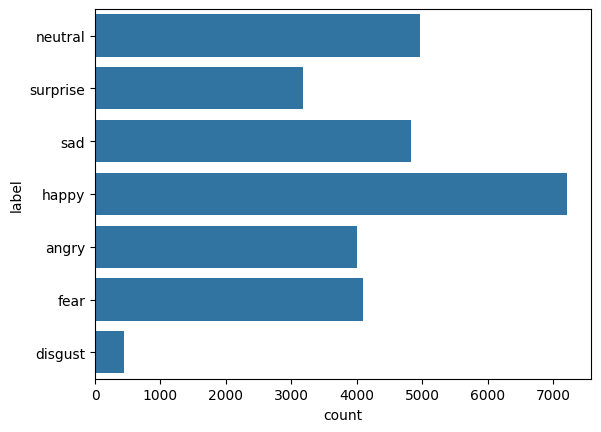

In [ ]:
sns.countplot(train['label'])

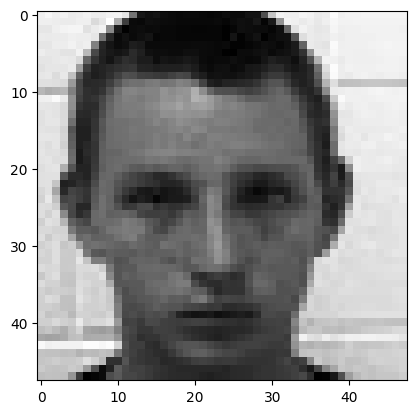

In [ ]:
from PIL import Image
img = Image.open(train['image'][0])
plt.imshow(img, cmap='gray');

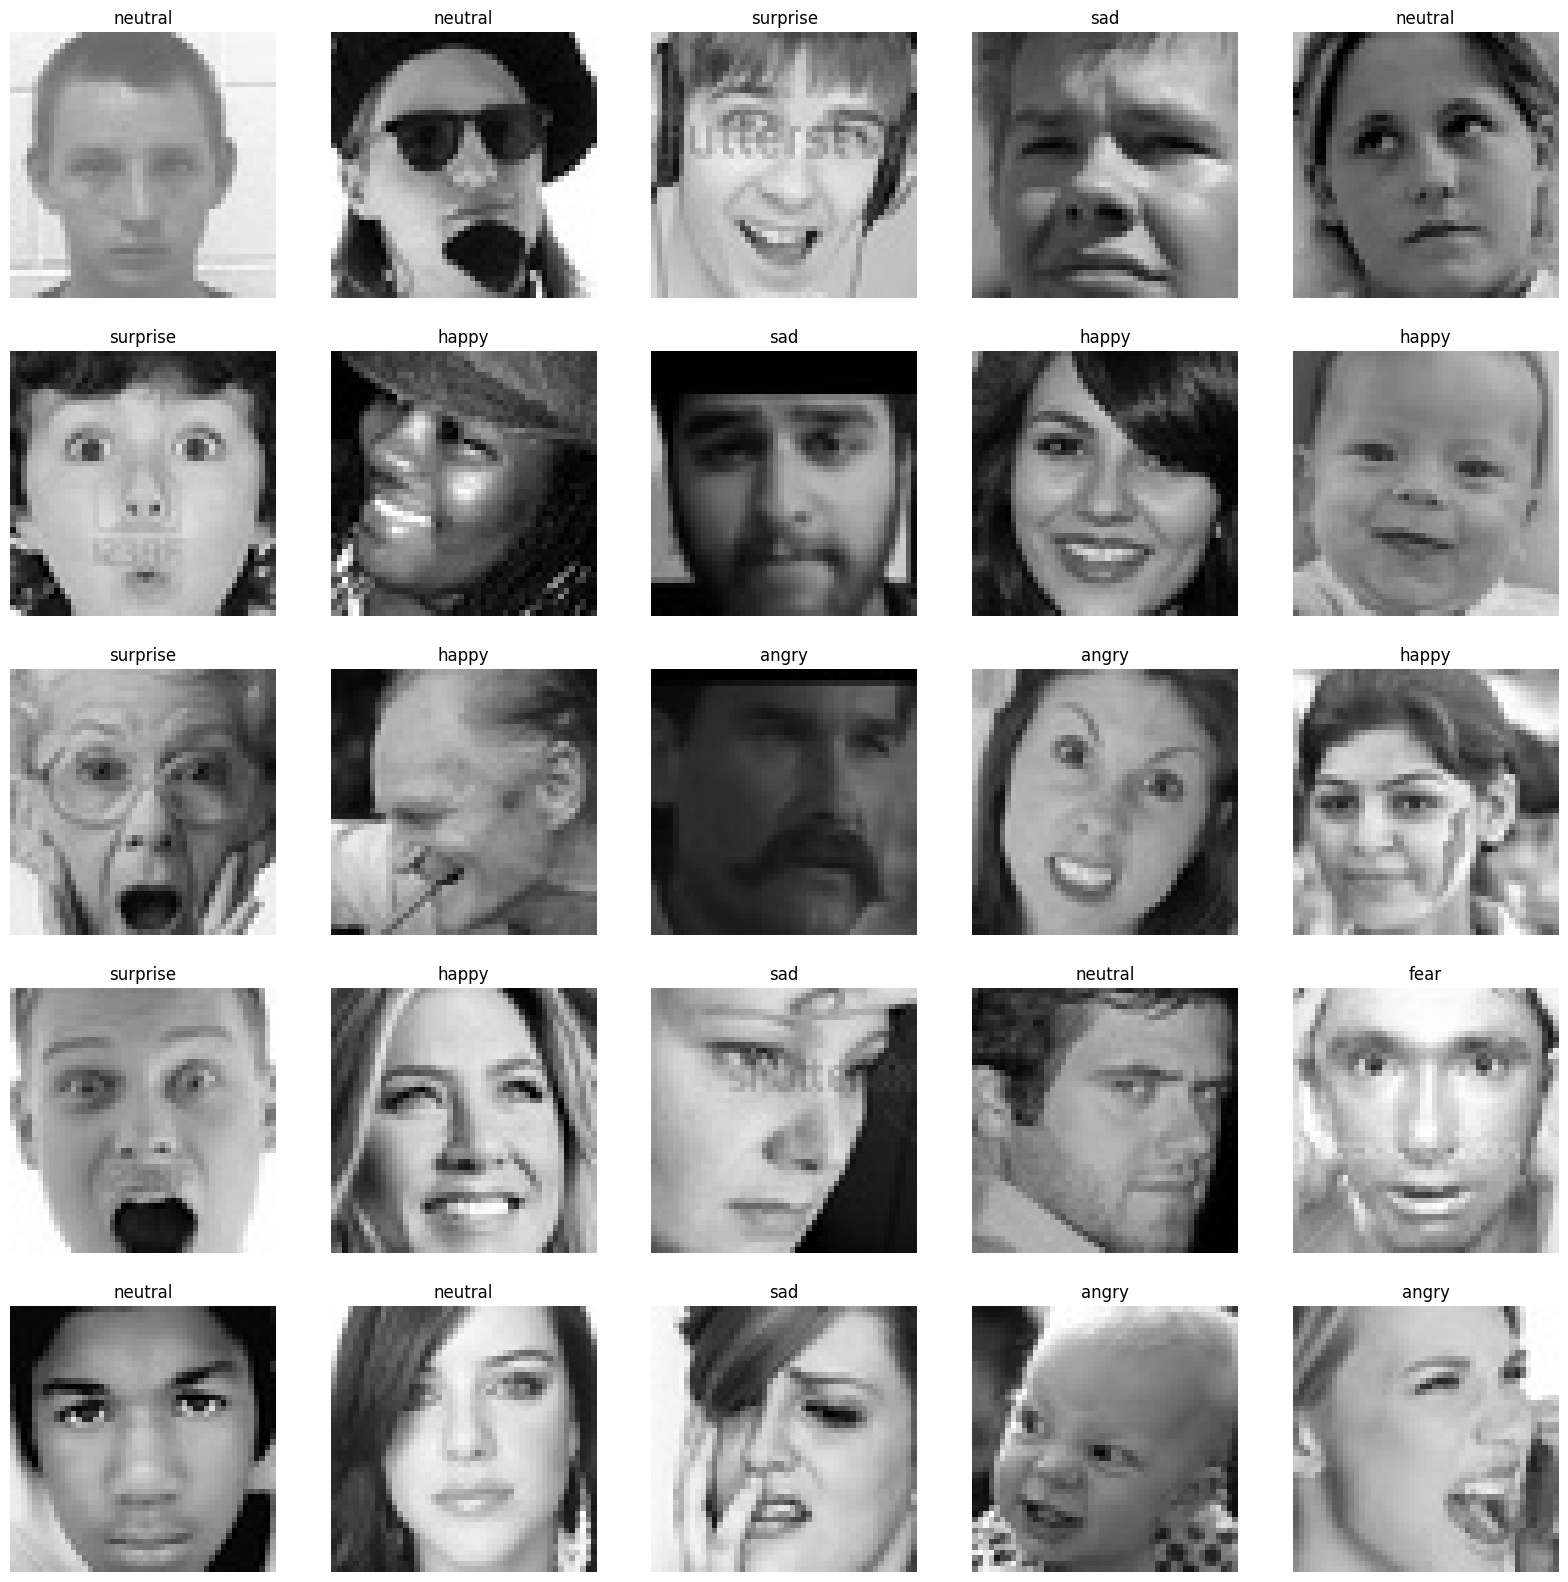

In [ ]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

## Feature Extraction

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [ ]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [ ]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [ ]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [ ]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [ ]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0.])

In [ ]:
# config
input_shape = (48, 48, 1)
output_class = 7

## Model Creation

In [ ]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train the model
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 865s 2s/step - accuracy: 0.2395 - loss: 1.8330 - val_accuracy: 0.2495 - val_loss: 1.7970
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 888s 2s/step - accuracy: 0.2587 - loss: 1.7809 - val_accuracy: 0.3064 - val_loss: 1.7062
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 921s 2s/step - accuracy: 0.3133 - loss: 1.7006 - val_accuracy: 0.3874 - val_loss: 1.5567
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 890s 2s/step - accuracy: 0.3609 - loss: 1.6227 - val_accuracy: 0.4327 - val_loss: 1.4699
Epoch 5/30
  1/449 ━━━━━━━━━━━━━━━━━━━━ 4:09:20 33s/step - accuracy: 0.3594 - loss: 1.5281

In [ ]:
model.save('facial_expression_model.h5')


## Plot the Results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

## Test with Image Data

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

**VGG-16**

In [ ]:
# Transfer Learning Models
def build_vgg16(input_shape=(48, 48, 3), num_classes=7,LEARNING_RATE=1e-3):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers
    x = base_model.output
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    optimizer = Adam(learning_rate=LEARNING_RATE)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
!pip install tensorflow
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
import numpy as np

# Reshape x_train and x_test to have 3 channels
x_train_reshaped = np.repeat(x_train, 3, axis=-1)  # Repeat grayscale channel 3 times
x_test_reshaped = np.repeat(x_test, 3, axis=-1)

# Now use x_train_reshaped and x_test_reshaped for training

#instantiate the vgg16 model
vgg16_model = build_vgg16(input_shape=(48, 48, 3), num_classes=7)

#fit the model
history = vgg16_model.fit(x=x_train_reshaped, y=y_train, batch_size=64, epochs=30, validation_data=(x_test_reshaped, y_test))

In [ ]:
model.save('facial_expression_model.h5')


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
# Reshape the image to have 3 channels before prediction
pred = vgg16_model.predict(x_test_reshaped[image_index].reshape(1, 48, 48, 3))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
# Use x_test_reshaped, which has 3 channels, for prediction
pred = vgg16_model.predict(x_test_reshaped[image_index].reshape(1, 48, 48, 3))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

In [ ]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
# Use x_test_reshaped, which has 3 channels, for prediction
pred = vgg16_model.predict(x_test_reshaped[image_index].reshape(1, 48, 48, 3))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Mobilenet-v2
**bold text**

In [ ]:
def build_mobilenetv2(input_shape=(48, 48, 3), num_classes=7, LEARNING_RATE=1e-3): # Added LEARNING_RATE as an argument with a default value
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers
    x = base_model.output
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    optimizer = Adam(learning_rate=LEARNING_RATE) # Now using the argument LEARNING_RATE
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
!pip install tensorflow
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
import numpy as np

# Reshape x_train and x_test to have 3 channels
x_train_reshaped = np.repeat(x_train, 3, axis=-1)  # Repeat grayscale channel 3 times
x_test_reshaped = np.repeat(x_test, 3, axis=-1)

# Now use x_train_reshaped and x_test_reshaped for training
#instantiate the MobileNetV2 model using the build_mobilenetv2 function
MobileNetV2_model = build_mobilenetv2(input_shape=(48, 48, 3), num_classes=7)

#fit the model
history = MobileNetV2_model.fit(x=x_train_reshaped, y=y_train, batch_size=64, epochs=30, validation_data=(x_test_reshaped, y_test))

In [ ]:
# Call save on the MobileNetV2_model object, not the build_mobilenetv2 function
MobileNetV2_model.save('facial_expression_model.h5')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt # Make sure to import matplotlib
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()
